In [2]:
import numpy
import numpy.linalg as la
from numpy import random
import itertools
from N_Level_Engine_v1 import*
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [4]:
#Write function to generate correlation matrix
def correlation_matrix(N):
    corr_matrix = np.identity(N)
    for i in range(N-1):
        corr_matrix[0,i+1] = np.cos(2*np.pi*(random.uniform()))
    for i in range(0,N):
        for j in range(i+1, N):
            corr_matrix[i,j] = corr_matrix[0,i]*corr_matrix[0,j]+np.sqrt((1-corr_matrix[0,i]**2)*(1-corr_matrix[0,j]**2))
            corr_matrix[j,i] = corr_matrix[i,j]
    return(corr_matrix)

In [23]:
#Write function to generate special correlation matrix
def generate_all_special_correlation_matrices(N):
    alignment = [1,-1]
    all_possible_sequences = list(itertools.product(alignment, repeat=N-1))
    pmatrices = []
    for i in range(2**(N-1)):
        pmatrix = np.identity(N)
        for j in range(N-1):
            pmatrix[0,j+1] = all_possible_sequences[i][j]
            pmatrix[j+1,0] = pmatrix[0,j+1]
        for k in range(1,N):
            for l in range(k+1, N):
                if pmatrix[0,k] == pmatrix[0,l]:
                    pmatrix[k,l] = 1
                else:
                    pmatrix[k,l] = -1
                pmatrix[l,k] = pmatrix[k,l]
        pmatrices.append(pmatrix)
    return pmatrices

In [37]:
#Write function to calculate correlation strength as represented by l-1 norm:
def corr_strength(pmatrix):
    strength = 0
    N = len(pmatrix)
    for i in range(N):
        for j in range(i+1, N):
            strength+=abs(pmatrix[i,j])
    return 2*strength/(N*(N-1))

(array([ 110.,  582., 2289., 2971., 1116.,  931.,  747.,  594.,  426.,
         234.]),
 array([0.37026625, 0.43315901, 0.49605178, 0.55894455, 0.62183731,
        0.68473008, 0.74762284, 0.81051561, 0.87340838, 0.93630114,
        0.99919391]),
 <BarContainer object of 10 artists>)

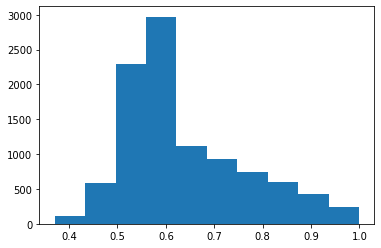

In [81]:
n = 10000
data = []
for i in range(n):
    data.append(corr_strength(correlation_matrix(4)))
plt.hist(data)

1.0

# N= 2

## Engine

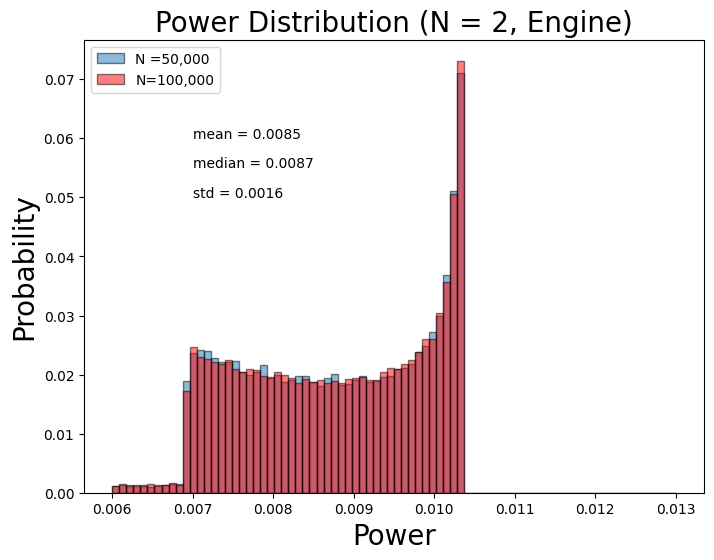

In [95]:
power_data1 = []
power_data2 = []
N1 = 50000
N2=100000
bin_list = np.linspace(0.006,0.013,81)
for i in range(N1):
    random_p1 = random.uniform(-1,1)
    p_matrix1 = np.array([[0,random_p1],[random_p1, 0]])
    ss = getSteadyState(4,1,3,0.1,0.1,2,0.2,p_matrix1,0,0,0.05)
    power_data1.append(powerSS(ss, 1,3,0,0.05))
for i in range(N2):
    random_p2 = random.uniform(-1,1)
    p_matrix2 = np.array([[0,random_p2],[random_p2, 0]])
    ss = getSteadyState(4,1,3,0.1,0.1,2,0.2,p_matrix2,0,0,0.05)
    power_data2.append(powerSS(ss, 1,3,0,0.05))
figure(figsize=(8, 6), dpi=100)
weights1 = np.ones_like(power_data1)/len(power_data1)
weights2 = np.ones_like(power_data2)/len(power_data2)
plt.hist(power_data1, bins = bin_list, weights = weights1, edgecolor = 'black',label = 'N =50,000', alpha =0.5)
plt.hist(power_data2, bins = bin_list, weights = weights2, color = "red", edgecolor = 'black', label = 'N=100,000', alpha =0.5)
plt.legend(loc = 'upper left')
plt.text(0.007, 0.06, s = 'mean = {0}'.format(round(np.mean(power_data), 4)), size = 10)
plt.text(0.007, 0.055, s = 'median = {0}'.format(round(np.median(power_data),4)), size= 10)
plt.text(0.007, 0.05, s = 'std = {0}'.format(round(np.std(power_data),4)), size = 10)
plt.xlabel("Power", size =20)
plt.ylabel("Probability", size = 20)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.title("Power Distribution (N = 2, Engine)", size =20)
plt.savefig('powerDistEngine_N=2.png', dpi=100)

## Refrigerator

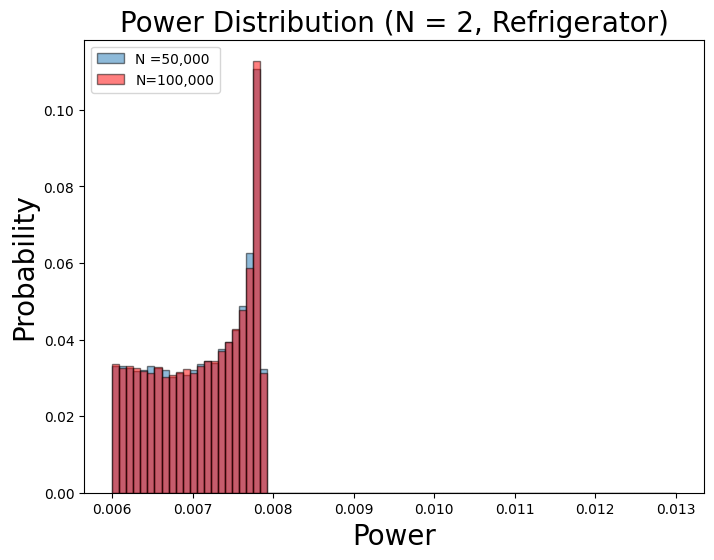

In [91]:
power_data1 = []
power_data2 = []
N1 = 50000
N2=100000
bin_list = np.linspace(0.006,0.013,81)
for i in range(N1):
    random_p1 = random.uniform(-1,1)
    p_matrix1 = np.array([[0,random_p1],[random_p1, 0]])
    ss = getSteadyState(4,1,3,0.1,0.1,2,1.5,p_matrix1,0,0,0.05)
    power_data1.append(abs(powerSS(ss, 1,3,0,0.05)))
for i in range(N2):
    random_p2 = random.uniform(-1,1)
    p_matrix2 = np.array([[0,random_p2],[random_p2, 0]])
    ss = getSteadyState(4,1,3,0.1,0.1,2,1.5,p_matrix2,0,0,0.05)
    power_data2.append(abs(powerSS(ss, 1,3,0,0.05)))
figure(figsize=(8, 6), dpi=100)
weights1 = np.ones_like(power_data1)/len(power_data1)
weights2 = np.ones_like(power_data2)/len(power_data2)
plt.hist(power_data1, bins = bin_list, weights = weights1, edgecolor = 'black',label = 'N =50,000', alpha =0.5)
plt.hist(power_data2, bins = bin_list, weights = weights2, color = "red", edgecolor = 'black', label = 'N=100,000', alpha =0.5)
plt.legend(loc = 'upper left')
#plt.text(0.1, 0.9, s = 'mean = {0}'.format(round(np.mean(power_data), 4)),transform=ax.transAxes, size = 30)
#plt.text(0.1, 0.8, s = 'median = {0}'.format(round(np.median(power_data),4)),transform=ax.transAxes, size= 30)
#plt.text(0.1, 0.7, s = 'std = {0}'.format(round(np.std(power_data),4)),transform=ax.transAxes, size = 30)
plt.xlabel("Power", size =20)
plt.ylabel("Probability", size = 20)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.title("Power Distribution (N = 2, Refrigerator)", size =20)
plt.savefig('powerDistRefrigerator_N=2.png', dpi=100)

# N= 3

## Engine

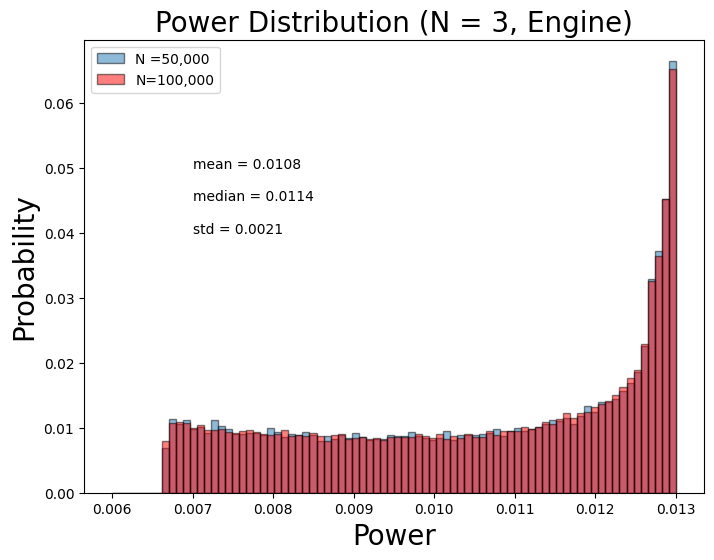

In [8]:
power_data1 = []
power_data2 = []
N1 = 50000
N2=100000
bin_list = np.linspace(0.006,0.013,81)
for i in range(N1):
    ss = getSteadyState(5,1,3,0.1,0.1,2,0.2,correlation_matrix(3),0,0,0.05)
    power_data1.append(powerSS(ss, 1,3,0,0.05))
for i in range(N2):
    ss = getSteadyState(5,1,3,0.1,0.1,2,0.2,correlation_matrix(3),0,0,0.05)
    power_data2.append(powerSS(ss, 1,3,0,0.05))
figure(figsize=(8, 6), dpi=100)
weights1 = np.ones_like(power_data1)/len(power_data1)
weights2 = np.ones_like(power_data2)/len(power_data2)
plt.hist(power_data1, bins = bin_list, weights = weights1, edgecolor = 'black',label = 'N =50,000', alpha =0.5)
plt.hist(power_data2, bins = bin_list, weights = weights2, color = "red", edgecolor = 'black', label = 'N=100,000', alpha =0.5)
plt.legend()
plt.text(0.007, 0.05, s = 'mean = {0}'.format(round(np.mean(power_data1), 4)), size = 10)
plt.text(0.007, 0.045, s = 'median = {0}'.format(round(np.median(power_data1),4)), size= 10)
plt.text(0.007, 0.04, s = 'std = {0}'.format(round(np.std(power_data1),4)), size = 10)
plt.xlabel("Power", size =20)
plt.ylabel("Probability", size = 20)
plt.title("Power Distribution (N = 3, Engine)", size =20)
plt.savefig('powerDistEngine_N=3.png', dpi=100)

In [8]:
special_correlation_matrices = generate_all_special_correlation_matrices(3)
power_list = [powerSS(getSteadyState(5,1,3,0.1,0.1,2,0.2, pmatrix, 0,0,0.05), 1,3,0,0.05) for pmatrix in special_correlation_matrices]
print(power_list)

[0.006645000114250942, 0.012624770090756278, 0.012624770090756274, 0.012624770090756276]


In [18]:
pmatrix = np.array([[1,-1,-1],[-1,1,1],[-1,1,1]])
ss = getSteadyState(5,1,3,0.1,0.1,2,0.2,pmatrix,0,0,0.05)
powerSS(ss, 1,3,0,0.05)

0.012624770090756276

NameError: name 'ax' is not defined

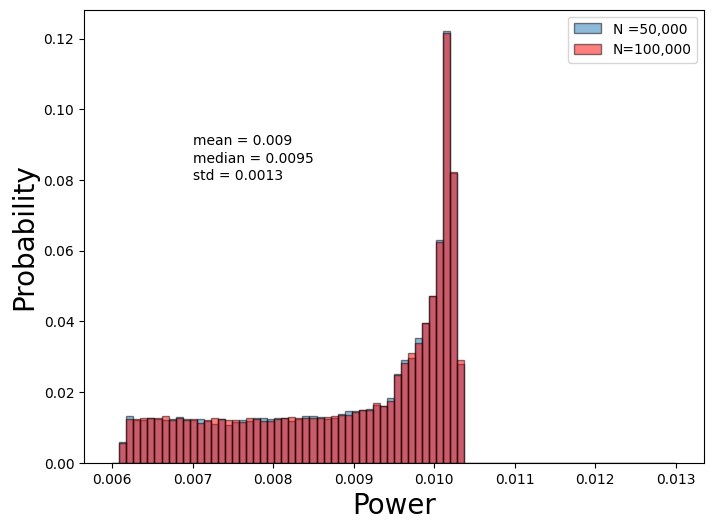

In [7]:
power_data1 = []
power_data2 = []
N1 = 50000
N2=100000
bin_list = np.linspace(0.006,0.013,81)
for i in range(N1):
    ss = getSteadyState(5,1,3,0.1,0.1,2,1.5,correlation_matrix(3),0,0,0.05)
    power_data1.append(abs(powerSS(ss, 1,3,0,0.05)))
for i in range(N2):
    ss = getSteadyState(5,1,3,0.1,0.1,2,1.5,correlation_matrix(3),0,0,0.05)
    power_data2.append(abs(powerSS(ss, 1,3,0,0.05)))
figure(figsize=(8, 6), dpi=100)
weights1 = np.ones_like(power_data1)/len(power_data1)
weights2 = np.ones_like(power_data2)/len(power_data2)
plt.hist(power_data1, bins = bin_list, weights = weights1, edgecolor = 'black',label = 'N =50,000', alpha =0.5)
plt.hist(power_data2, bins = bin_list, weights = weights2, color = "red", edgecolor = 'black', label = 'N=100,000', alpha =0.5)
plt.legend()
plt.text(0.007, 0.09, s = 'mean = {0}'.format(round(np.mean(power_data1), 4)), size = 10)
plt.text(0.007, 0.085, s = 'median = {0}'.format(round(np.median(power_data1),4)), size= 10)
plt.text(0.007, 0.08, s = 'std = {0}'.format(round(np.std(power_data1),4)), size = 10)
plt.xlabel("Power", size =20)
plt.ylabel("Probability", size = 20)
plt.title("Power Distribution (N = 3, Refrigerator)", size =20)
plt.savefig('powerDistRefrigerator_N=3.png', dpi=100)

# N = 4 

## Engine

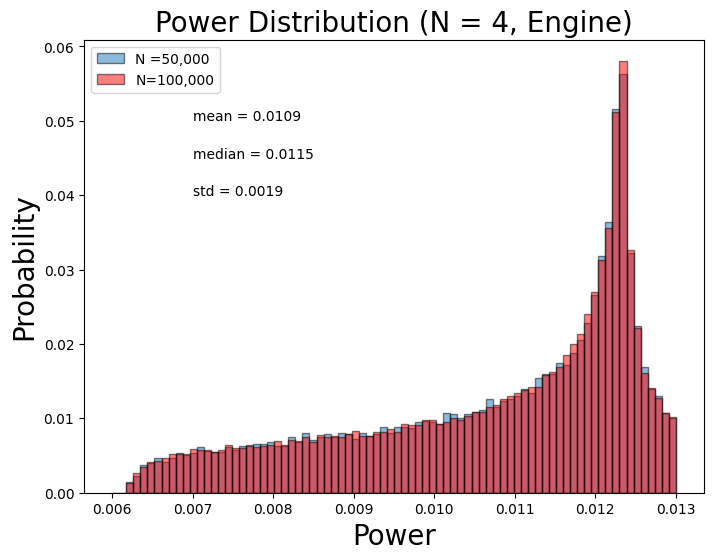

In [9]:
power_data1 = []
power_data2 = []
N1 = 50000
N2=100000
bin_list = np.linspace(0.006,0.013,81)
for i in range(N1):
    ss = getSteadyState(6,1,3,0.1,0.1,2,0.2,correlation_matrix(4),0,0,0.05)
    power_data1.append(powerSS(ss, 1,3,0,0.05))
for i in range(N2):
    ss = getSteadyState(6,1,3,0.1,0.1,2,0.2,correlation_matrix(4),0,0,0.05)
    power_data2.append(powerSS(ss, 1,3,0,0.05))
figure(figsize=(8, 6), dpi=100)
weights1 = np.ones_like(power_data1)/len(power_data1)
weights2 = np.ones_like(power_data2)/len(power_data2)
plt.hist(power_data1, bins = bin_list, weights = weights1, edgecolor = 'black',label = 'N =50,000', alpha =0.5)
plt.hist(power_data2, bins = bin_list, weights = weights2, color = "red", edgecolor = 'black', label = 'N=100,000', alpha =0.5)
plt.legend()
plt.text(0.007, 0.05, s = 'mean = {0}'.format(round(np.mean(power_data1), 4)), size = 10)
plt.text(0.007, 0.045, s = 'median = {0}'.format(round(np.median(power_data1),4)), size= 10)
plt.text(0.007, 0.04, s = 'std = {0}'.format(round(np.std(power_data1),4)), size = 10)
plt.xlabel("Power", size =20)
plt.ylabel("Probability", size = 20)
plt.title("Power Distribution (N = 4, Engine)", size =20)
plt.savefig('powerDistEngine_N=4.png', dpi=100)

## Refrigerator

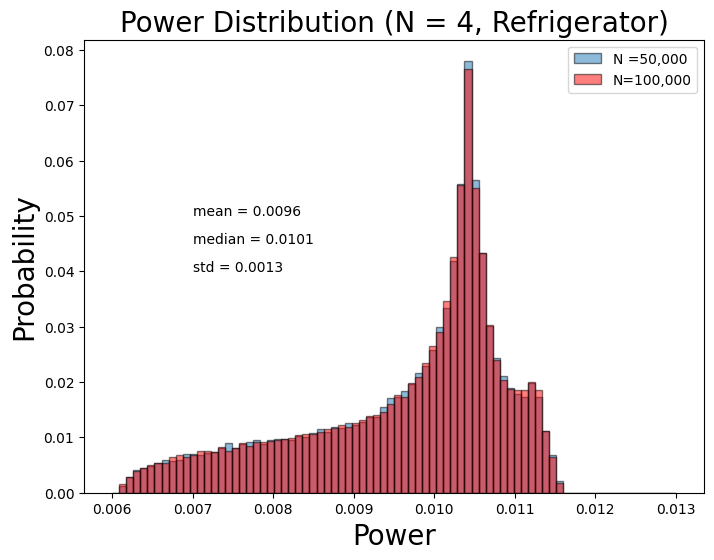

In [11]:
power_data1 = []
power_data2 = []
N1 = 50000
N2=100000
bin_list = np.linspace(0.006,0.013,81)
for i in range(N1):
    ss = getSteadyState(6,1,3,0.1,0.1,2,1.5,correlation_matrix(4),0,0,0.05)
    power_data1.append(abs(powerSS(ss, 1,3,0,0.05)))
for i in range(N2):
    ss = getSteadyState(6,1,3,0.1,0.1,2,1.5,correlation_matrix(4),0,0,0.05)
    power_data2.append(abs(powerSS(ss, 1,3,0,0.05)))
figure(figsize=(8, 6), dpi=100)
weights1 = np.ones_like(power_data1)/len(power_data1)
weights2 = np.ones_like(power_data2)/len(power_data2)
plt.hist(power_data1, bins = bin_list, weights = weights1, edgecolor = 'black',label = 'N =50,000', alpha =0.5)
plt.hist(power_data2, bins = bin_list, weights = weights2, color = "red", edgecolor = 'black', label = 'N=100,000', alpha =0.5)
plt.legend()
plt.text(0.007, 0.05, s = 'mean = {0}'.format(round(np.mean(power_data1), 4)), size = 10)
plt.text(0.007, 0.045, s = 'median = {0}'.format(round(np.median(power_data1),4)), size= 10)
plt.text(0.007, 0.04, s = 'std = {0}'.format(round(np.std(power_data1),4)), size = 10)
plt.xlabel("Power", size =20)
plt.ylabel("Probability", size = 20)
plt.title("Power Distribution (N = 4, Refrigerator)", size =20)
plt.savefig('powerDistRefrigerator_N=4.png', dpi=100)

# N = 5

## Refrigerator

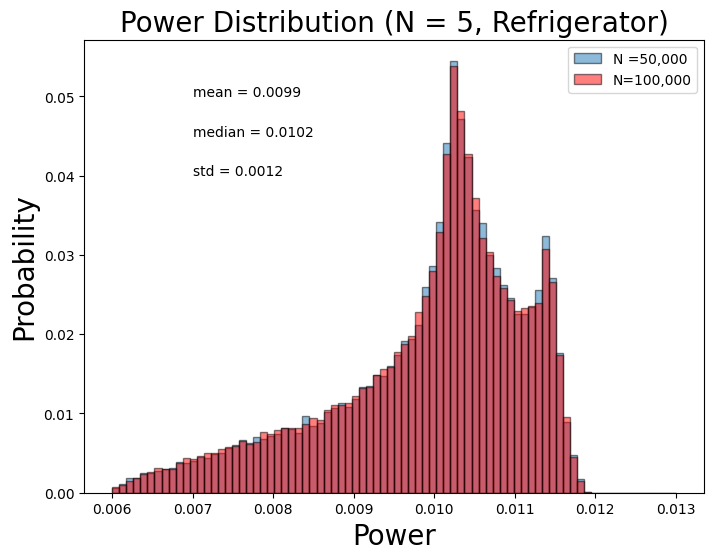

In [12]:
power_data1 = []
power_data2 = []
N1 = 50000
N2=100000
bin_list = np.linspace(0.006,0.013,81)
for i in range(N1):
    ss = getSteadyState(7,1,3,0.1,0.1,2,1.5,correlation_matrix(5),0,0,0.05)
    power_data1.append(abs(powerSS(ss, 1,3,0,0.05)))
for i in range(N2):
    ss = getSteadyState(7,1,3,0.1,0.1,2,1.5,correlation_matrix(5),0,0,0.05)
    power_data2.append(abs(powerSS(ss, 1,3,0,0.05)))
figure(figsize=(8, 6), dpi=100)
weights1 = np.ones_like(power_data1)/len(power_data1)
weights2 = np.ones_like(power_data2)/len(power_data2)
plt.hist(power_data1, bins = bin_list, weights = weights1, edgecolor = 'black',label = 'N =50,000', alpha =0.5)
plt.hist(power_data2, bins = bin_list, weights = weights2, color = "red", edgecolor = 'black', label = 'N=100,000', alpha =0.5)
plt.legend()
plt.text(0.007, 0.05, s = 'mean = {0}'.format(round(np.mean(power_data1), 4)), size = 10)
plt.text(0.007, 0.045, s = 'median = {0}'.format(round(np.median(power_data1),4)), size= 10)
plt.text(0.007, 0.04, s = 'std = {0}'.format(round(np.std(power_data1),4)), size = 10)
plt.xlabel("Power", size =20)
plt.ylabel("Probability", size = 20)
plt.title("Power Distribution (N = 5, Refrigerator)", size =20)
plt.savefig('powerDistRefrigerator_N=5.png', dpi=100)

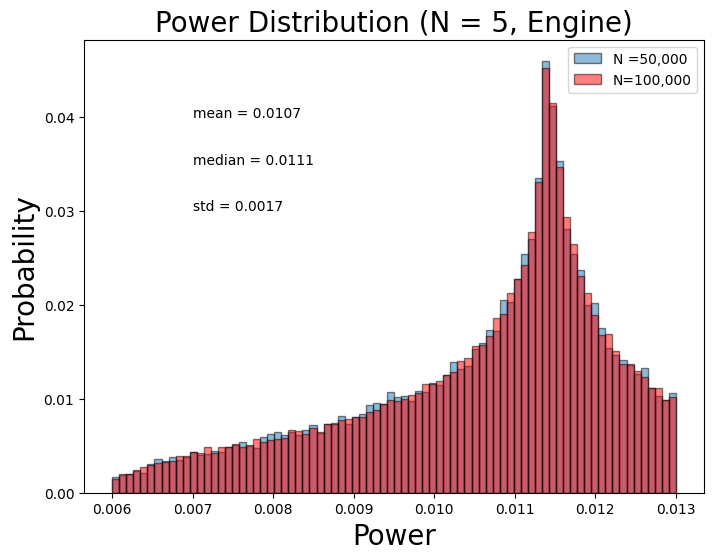

In [7]:
power_data1 = []
power_data2 = []
N1 = 50000
N2=100000
bin_list = np.linspace(0.006,0.013,81)
for i in range(N1):
    ss = getSteadyState(7,1,3,0.1,0.1,2,0.2,correlation_matrix(5),0,0,0.05)
    power_data1.append(abs(powerSS(ss, 1,3,0,0.05)))
for i in range(N2):
    ss = getSteadyState(7,1,3,0.1,0.1,2,0.2,correlation_matrix(5),0,0,0.05)
    power_data2.append(abs(powerSS(ss, 1,3,0,0.05)))
figure(figsize=(8, 6), dpi=100)
weights1 = np.ones_like(power_data1)/len(power_data1)
weights2 = np.ones_like(power_data2)/len(power_data2)
plt.hist(power_data1, bins = bin_list, weights = weights1, edgecolor = 'black',label = 'N =50,000', alpha =0.5)
plt.hist(power_data2, bins = bin_list, weights = weights2, color = "red", edgecolor = 'black', label = 'N=100,000', alpha =0.5)
plt.legend()
plt.text(0.007, 0.04, s = 'mean = {0}'.format(round(np.mean(power_data1), 4)), size = 10)
plt.text(0.007, 0.035, s = 'median = {0}'.format(round(np.median(power_data1),4)), size= 10)
plt.text(0.007, 0.03, s = 'std = {0}'.format(round(np.std(power_data1),4)), size = 10)
plt.xlabel("Power", size =20)
plt.ylabel("Probability", size = 20)
plt.title("Power Distribution (N = 5, Engine)", size =20)
plt.savefig('powerDistEngine_N=5.png', dpi=100)

In [8]:
power_data1 = []
power_data2 = []
N1 = 50000
N2=100000
bin_list = np.linspace(0.006,0.013,81)
for i in range(N1):
    ss = getSteadyState(10,1,3,0.1,0.1,2,0.2,correlation_matrix(8),0,0,0.05)
    power_data1.append(abs(powerSS(ss, 1,3,0,0.05)))
for i in range(N2):
    ss = getSteadyState(10,1,3,0.1,0.1,2,0.2,correlation_matrix(8),0,0,0.05)
    power_data2.append(abs(powerSS(ss, 1,3,0,0.05)))

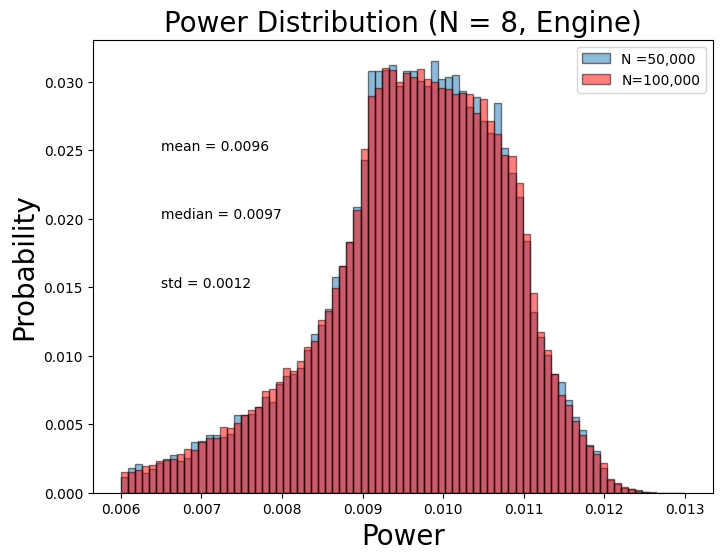

In [13]:
figure(figsize=(8, 6), dpi=100)
weights1 = np.ones_like(power_data1)/len(power_data1)
weights2 = np.ones_like(power_data2)/len(power_data2)
plt.hist(power_data1, bins = bin_list, weights = weights1, edgecolor = 'black',label = 'N =50,000', alpha =0.5)
plt.hist(power_data2, bins = bin_list, weights = weights2, color = "red", edgecolor = 'black', label = 'N=100,000', alpha =0.5)
plt.legend()
plt.text(0.0065, 0.025, s = 'mean = {0}'.format(round(np.mean(power_data1), 4)), size = 10)
plt.text(0.0065, 0.02, s = 'median = {0}'.format(round(np.median(power_data1),4)), size= 10)
plt.text(0.0065, 0.015, s = 'std = {0}'.format(round(np.std(power_data1),4)), size = 10)
plt.xlabel("Power", size =20)
plt.ylabel("Probability", size = 20)
plt.title("Power Distribution (N = 8, Engine)", size =20)
plt.savefig('powerDistEngine_N=8.png', dpi=100)

In [16]:
power_data1 = []
power_data2 = []
N1 = 50000
N2=100000
bin_list = np.linspace(0.006,0.013,81)
for i in range(N1):
    ss = getSteadyState(9,1,3,0.1,0.1,2,1.5,correlation_matrix(7),0,0,0.05)
    power_data1.append(abs(powerSS(ss, 1,3,0,0.05)))
for i in range(N2):
    ss = getSteadyState(9,1,3,0.1,0.1,2,1.5,correlation_matrix(7),0,0,0.05)
    power_data2.append(abs(powerSS(ss, 1,3,0,0.05)))

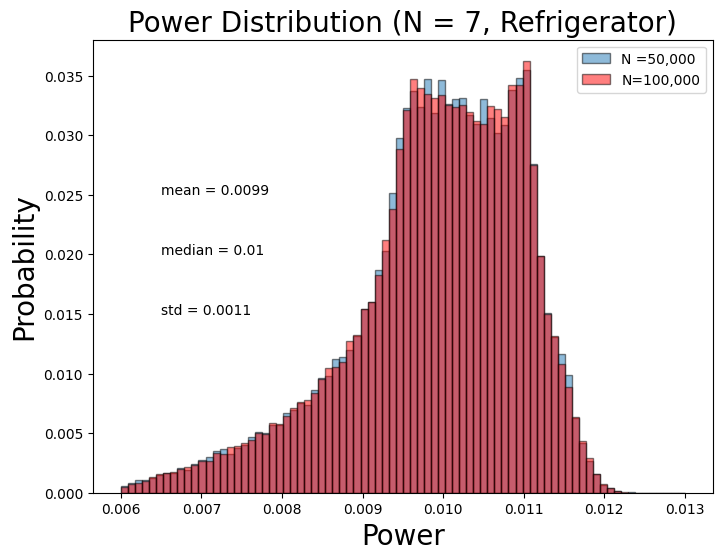

In [17]:
figure(figsize=(8, 6), dpi=100)
weights1 = np.ones_like(power_data1)/len(power_data1)
weights2 = np.ones_like(power_data2)/len(power_data2)
plt.hist(power_data1, bins = bin_list, weights = weights1, edgecolor = 'black',label = 'N =50,000', alpha =0.5)
plt.hist(power_data2, bins = bin_list, weights = weights2, color = "red", edgecolor = 'black', label = 'N=100,000', alpha =0.5)
plt.legend()
plt.text(0.0065, 0.025, s = 'mean = {0}'.format(round(np.mean(power_data1), 4)), size = 10)
plt.text(0.0065, 0.02, s = 'median = {0}'.format(round(np.median(power_data1),4)), size= 10)
plt.text(0.0065, 0.015, s = 'std = {0}'.format(round(np.std(power_data1),4)), size = 10)
plt.xlabel("Power", size =20)
plt.ylabel("Probability", size = 20)
plt.title("Power Distribution (N = 7, Refrigerator)", size =20)
plt.savefig('powerDistRefrigerator_N=7.png', dpi=100)

In [18]:
power_data1 = []
power_data2 = []
N1 = 50000
N2=100000
bin_list = np.linspace(0.006,0.013,81)
for i in range(N1):
    ss = getSteadyState(8,1,3,0.1,0.1,2,1.5,correlation_matrix(6),0,0,0.05)
    power_data1.append(abs(powerSS(ss, 1,3,0,0.05)))
for i in range(N2):
    ss = getSteadyState(8,1,3,0.1,0.1,2,1.5,correlation_matrix(6),0,0,0.05)
    power_data2.append(abs(powerSS(ss, 1,3,0,0.05)))

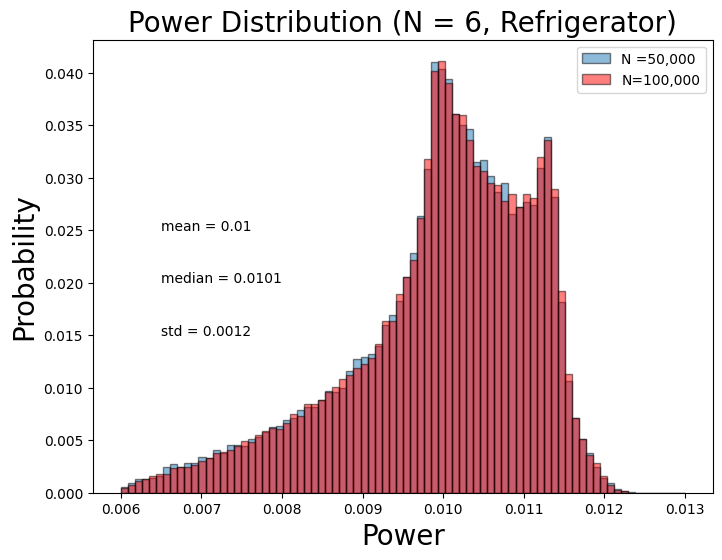

In [19]:
figure(figsize=(8, 6), dpi=100)
weights1 = np.ones_like(power_data1)/len(power_data1)
weights2 = np.ones_like(power_data2)/len(power_data2)
plt.hist(power_data1, bins = bin_list, weights = weights1, edgecolor = 'black',label = 'N =50,000', alpha =0.5)
plt.hist(power_data2, bins = bin_list, weights = weights2, color = "red", edgecolor = 'black', label = 'N=100,000', alpha =0.5)
plt.legend()
plt.text(0.0065, 0.025, s = 'mean = {0}'.format(round(np.mean(power_data1), 4)), size = 10)
plt.text(0.0065, 0.02, s = 'median = {0}'.format(round(np.median(power_data1),4)), size= 10)
plt.text(0.0065, 0.015, s = 'std = {0}'.format(round(np.std(power_data1),4)), size = 10)
plt.xlabel("Power", size =20)
plt.ylabel("Probability", size = 20)
plt.title("Power Distribution (N = 6, Refrigerator)", size =20)
plt.savefig('powerDistRefrigerator_N=6.png', dpi=100)

In [31]:
max_power_data = []
for N in range(3,15):
    special_correlation_matrices = generate_all_special_correlation_matrices(N)
    power_list = [abs(powerSS(getSteadyState(N+2,1,3,0.1,0.1,2,0.2, pmatrix, 0,0,0.05), 1,3,0,0.05)) for pmatrix in special_correlation_matrices]
    max_power_data.append(max(power_list))

In [33]:
ref_power_data = []
for N in range(3,15):
    ref_power = abs(powerSS(getSteadyState(N+2, 1,3,0.1,0.1,2,0.2,np.identity(N), 0, 0 ,0.05),1,3,0,0.05))
    ref_power_data.append(ref_power)

Text(0.5, 1.0, 'Engine')

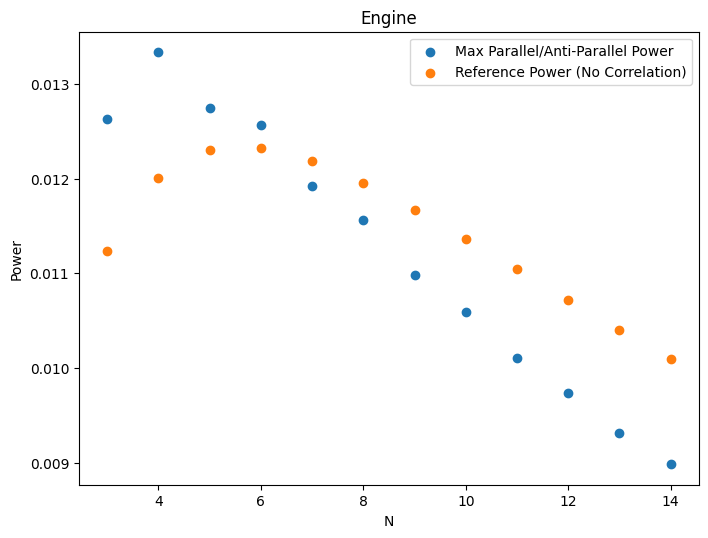

In [44]:
figure(figsize=(8, 6), dpi=100)
N = np.linspace(3,14,12)
plt.scatter(N, max_power_data)
plt.scatter(N, ref_power_data)
plt.legend(['Max Parallel/Anti-Parallel Power', 'Reference Power (No Correlation)'])
plt.xlabel('N')
plt.ylabel('Power')
plt.title('Engine')

In [45]:
min_power_data = []
for N in range(3,15):
    special_correlation_matrices = generate_all_special_correlation_matrices(N)
    power_list = [abs(powerSS(getSteadyState(N+2,1,3,0.1,0.1,2,0.2, pmatrix, 0,0,0.05), 1,3,0,0.05)) for pmatrix in special_correlation_matrices]
    min_power_data.append(min(power_list))

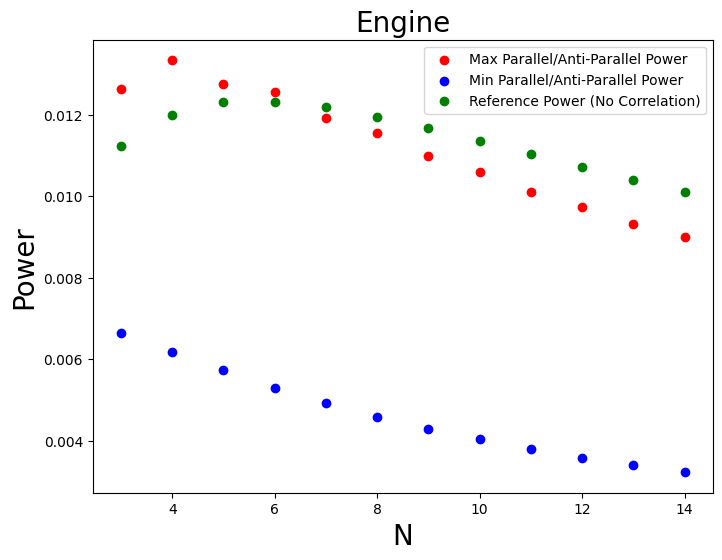

In [52]:
figure(figsize=(8, 6), dpi=100)
N = np.linspace(3,14,12)
plt.scatter(N, max_power_data, color ='red')
plt.scatter(N, min_power_data, color = 'blue')
plt.scatter(N, ref_power_data, color = 'green')
plt.legend(['Max Parallel/Anti-Parallel Power','Min Parallel/Anti-Parallel Power','Reference Power (No Correlation)'])
plt.xlabel('N', size = 20)
plt.ylabel('Power', size = 20)
plt.title('Engine', size = 20)
plt.savefig('Power_Comparison_Engine.png')

In [53]:
max_power_data2 = []
for N in range(3,15):
    special_correlation_matrices = generate_all_special_correlation_matrices(N)
    power_list = [abs(powerSS(getSteadyState(N+2,1,3,0.1,0.1,2,1.5, pmatrix, 0,0,0.05), 1,3,0,0.05)) for pmatrix in special_correlation_matrices]
    max_power_data2.append(max(power_list))

In [72]:
min_power_data2 = []
for N in range(3,15):
    special_correlation_matrices = generate_all_special_correlation_matrices(N)
    power_list = [powerSS(getSteadyState(N+2,1,3,0.1,0.1,2,1.5, pmatrix, 0,0,0.05), 1,3,0,0.05) for pmatrix in special_correlation_matrices]
    min_power_data2.append(-max(power_list))

In [55]:
ref_power_data2 = []
for N in range(3,15):
    ref_power = abs(powerSS(getSteadyState(N+2, 1,3,0.1,0.1,2,1.5,np.identity(N), 0, 0 ,0.05),1,3,0,0.05))
    ref_power_data2.append(ref_power)

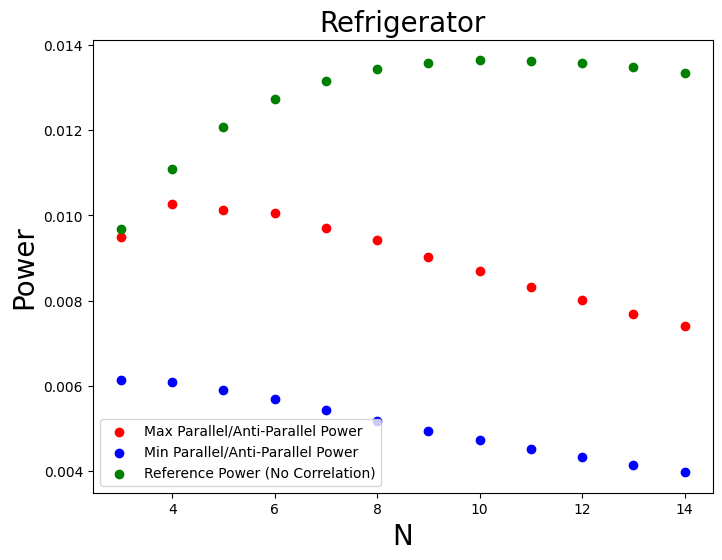

In [73]:
figure(figsize=(8, 6), dpi=100)
N = np.linspace(3,14,12)
plt.scatter(N, max_power_data2, color ='red')
plt.scatter(N, min_power_data2, color = 'blue')
plt.scatter(N, ref_power_data2, color = 'green')
plt.legend(['Max Parallel/Anti-Parallel Power','Min Parallel/Anti-Parallel Power','Reference Power (No Correlation)'])
plt.xlabel('N', size = 20)
plt.ylabel('Power', size = 20)
plt.title('Refrigerator', size = 20)
plt.savefig('Power_Comparison_Refrigerator.png')b

# Angle Preferred by Power

In [37]:
peak1_angles = []
peak2_angles = []
samples = 50000
N = 5
for n in range(samples):
    corr_matrix = np.identity(N)
    angles = [random.uniform(0,2*np.pi) for i in range(N-1)]
    for i in range(N-1):
        corr_matrix[0,i+1] = np.cos(angles[i])
    for i in range(0,N):
        for j in range(i+1, N):
            corr_matrix[i,j] = corr_matrix[0,i]*corr_matrix[0,j]+np.sqrt((1-corr_matrix[0,i]**2)*(1-corr_matrix[0,j]**2))
            corr_matrix[j,i] = corr_matrix[i,j]
    ss = getSteadyState(7,1,3,0.1,0.1,2,1.5,corr_matrix,0,0, 0.05)
    power = abs(powerSS(ss,1,3,0,0.05))
    if power > 0.01025 and power<0.01075:
        peak1_angles.append(angles)
    elif power >0.01125 and power<0.01175:
        peak2_angles.append(angles)
peak1_angles = [item for sublist in peak1_angles for item in sublist]
peak2_angles =[item for sublist in peak2_angles for item in sublist]

([<matplotlib.axis.XTick at 0x1d5a779ff08>,
 [Text(0.0, 0, '0'),
  Text(0.7853981633974483, 0, '$\\pi/4$'),
  Text(1.5707963267948966, 0, '$\\pi/2$'),
  Text(2.356194490192345, 0, '$3\\pi/4$'),
  Text(3.141592653589793, 0, '$\\pi$'),
  Text(3.9269908169872414, 0, '$5\\pi/4$'),
  Text(4.71238898038469, 0, '$3\\pi/2$'),
  Text(5.497787143782138, 0, '$7\\pi/4$'),
  Text(6.283185307179586, 0, '$2\\pi$')])

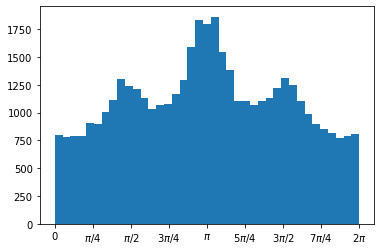

In [49]:
bin_list = np.linspace(0,2*np.pi,40)
plt.hist(peak1_angles, bins = bin_list)
plt.xticks([0,np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2,7*np.pi/4, 2*np.pi],
           ["0", "$\pi/4$", "$\pi/2$", "$3\pi/4$","$\pi$", "$5\pi/4$", "$3\pi/2$", "$7\pi/4$", "$2\pi$"])

([<matplotlib.axis.XTick at 0x1d5a7862d08>,
 [Text(0.0, 0, '0'),
  Text(0.7853981633974483, 0, '$\\pi/4$'),
  Text(1.5707963267948966, 0, '$\\pi/2$'),
  Text(2.356194490192345, 0, '$3\\pi/4$'),
  Text(3.141592653589793, 0, '$\\pi$'),
  Text(3.9269908169872414, 0, '$5\\pi/4$'),
  Text(4.71238898038469, 0, '$3\\pi/2$'),
  Text(5.497787143782138, 0, '$7\\pi/4$'),
  Text(6.283185307179586, 0, '$2\\pi$')])

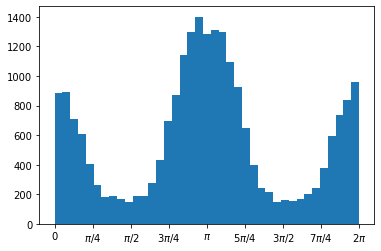

In [48]:
bin_list = np.linspace(0,2*np.pi,40)
plt.hist(peak2_angles, bins = bin_list)
plt.xticks([0,np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2,7*np.pi/4, 2*np.pi],
           ["0", "$\pi/4$", "$\pi/2$", "$3\pi/4$","$\pi$", "$5\pi/4$", "$3\pi/2$", "$7\pi/4$", "$2\pi$"])

In [36]:
peak2_angles[0]

[0.6091824210412299, 3.472491696772388, 3.345076716470121, 0.15189692245415337]